Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import returnGenerator as constants

In [2]:
FILE_PATH = 'worst_failure.csv'
# FILE_PATH = 'Investigation/saveData0.csv'

df = pd.read_csv(FILE_PATH)

Check rates

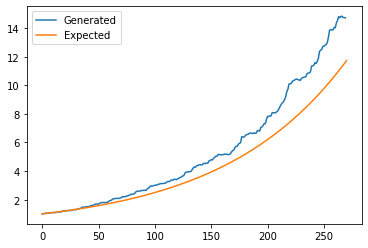

In [3]:
# Inflation
plt.plot(df["Inflation"],label='Generated')
expected_inflation_qt = constants.INFLATION_MEAN ** (1/4)

expected_inflation_ls = [expected_inflation_qt]

for _ in df["Inflation"]:
    expected_inflation_ls.append(expected_inflation_ls[-1] * expected_inflation_qt)

plt.plot(expected_inflation_ls,label='Expected')
plt.legend() 


1.08590775928037
1.1269460799411393


,Generated,Expected
avg,1.085908,1.095


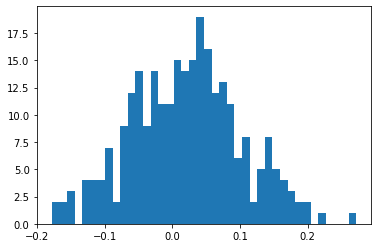

In [13]:
yr_frmt_stock_returns = (df['Stock Returns']+1)
print(yr_frmt_stock_returns.mean()**4)
test = yr_frmt_stock_returns**4
print((yr_frmt_stock_returns**4).mean())

plt.hist(df['Stock Returns'],40)
data = {'Generated':[(df['Stock Returns'].mean()+1)**4],
        'Expected':[constants.EQUITY_MEAN]}

pd.DataFrame(data, index=['avg'
                               ])
